<a href="https://colab.research.google.com/github/digantkumar/Digant-Kumar/blob/master/Task%203%20-%20Text%20Reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 3 - TEXT RECONSTRUCTION APPLICATION**

###**Declaration**

By submitting this exam, I declare

(1) that all work of it is my own;

(2) that I did not seek whole or partial solutions for any part of my submission from others; and

(3) that I did not and will not discuss, exchange, share, or publish complete or partial solutions for this exam or any part of it.

### **Importing the required libraries**

In [0]:

import os
from pathlib import Path
import glob
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave
from keras.preprocessing.image import load_img, array_to_img, img_to_array, ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input
from keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
np.random.seed(111)

Using TensorFlow backend.


In [0]:
# Creating the root mean square function
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))
        

### **DENSE, MULTI LAYER MODEL**

In [0]:
#################################################################################################
#########                        DENSE MULTI LAYER MODEL                                 ########
#################################################################################################

def build_autoencoder():
    # Flattening the size of the image to 226800 pixels (420*540)
    input_img = tf.keras.layers.Input(shape=(226800))
    
    # Encoder function to learn a compressed data structure
    hidden_layer_1 = tf.keras.layers.Dense(units = 512, activation = tf.nn.relu)(input_img)
    hidden_layer_2 = tf.keras.layers.Dense(units = 256, activation = tf.nn.relu)(hidden_layer_1)
    hidden_layer_3 = tf.keras.layers.Dense(units = 128, activation = tf.nn.relu)(hidden_layer_2)
    encoder = tf.keras.layers.Dense(units = 128, activation = tf.nn.sigmoid)(hidden_layer_3)
    
    # Decoder function to reconstruct the data from lower dimension to its higher dimension 
    hid_layer_1 = tf.keras.layers.Dense(units = 256, activation = tf.nn.relu)(encoder)
    hid_layer_2 = tf.keras.layers.Dense(units = 512, activation = tf.nn.relu)(hid_layer_1)
    decoder = tf.keras.layers.Dense(units = 226800, activation = tf.nn.sigmoid)(hid_layer_2)

    # Combines both the encoder and decoder and generates the output
    autoencoder = tf.keras.models.Model(inputs=input_img, outputs=decoder)
    autoencoder.compile(optimizer='adam', loss=root_mean_squared_error)
    return autoencoder

autoencoder = build_autoencoder()
autoencoder.summary()

Model: "model_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_54 (InputLayer)        [(None, 226800)]          0         
_________________________________________________________________
dense_67 (Dense)             (None, 512)               116122112 
_________________________________________________________________
dense_68 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_69 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_70 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_71 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_72 (Dense)             (None, 512)               131

In [0]:
# Loading the dataset by uploading the files on Colab
# Note: The train, train cleaned and test files need to renamed Train, Train_cleaned, Test respectively
# in order for the code to work.
train_images = glob.glob("Train/*.png")
train_labels = glob.glob("Train_cleaned/*.png")
test_images = glob.glob("Test/*.png")
X = []
Y = []
test_img_load = []

# Running a loop to go through the images and at the same time normalizing them
for img in train_images:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in train_labels:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)

for img in test_images:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    test_img_load.append(img)

X = np.array(X)
Y = np.array(Y)
test_img_load = np.array(test_img_load)

X = np.reshape(X, (X.shape[0], 226800))
Y = np.reshape(Y, (Y.shape[0], 226800))
test_img_load = np.reshape(test_img_load, (test_img_load.shape[0], 226800))

# Split the dataset into training and validation. Always set the random state!!
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

# Train your model
autoencoder.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_valid, y_valid))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Total number of training samples:  (129, 226800)
Total number of validation samples:  (15, 226800)
Epoch 1/100
17/17 [==============================] - 1s 41ms/step - loss: 0.3743 - val_loss: 0.2561
Epoch 2/100
17/17 [==============================] - 1s 35ms/step - loss: 0.2695 - val_loss: 0.2563
Epoch 3/100
17/17 [==============================] - 1s 35ms/step - loss: 0.2629 - val_loss: 0.2489
Epoch 4/100
17/17 [==============================] - 1s 36ms/step - loss: 0.2576 - val_loss: 0.2477
Epoch 5/100
17/17 [==============================] - 1s 35ms/step - loss: 0.2590 - val_loss: 0.2486
Epoch 6/100
17/17 [==============================] - 1s 36ms/step - loss: 0.2560 - val_loss: 0.2473
Epoch 7/100
17/17 [==============================] - 1s 35ms/step - loss: 0.2585 - val_loss: 0.2474
Epoch 8/100
17/17 [==============================] - 1s 35ms/step - loss: 0.2565 - val_loss: 0.2485
Epoch 9/100
17/17 [==============================] - 1s 36ms/step - loss: 0.2577 - val_loss: 0.2478
E

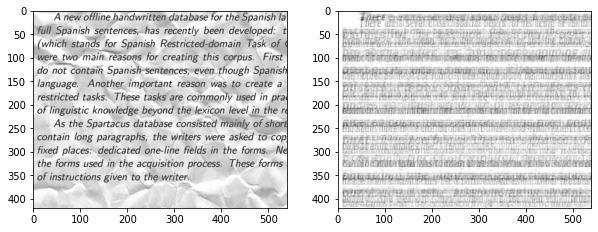

In [0]:
# Compute the prediction
predicted_label = np.squeeze(autoencoder.predict(test_img_load))
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(test_img_load[1].reshape(420,540) , cmap='gray')
ax[1].imshow(predicted_label[1].reshape(420,540), cmap='gray')
plt.show()

### **CNN BASIC MODEL**

In [0]:
#################################################################################################
#########                           CNN BASIC MODEL                                      ########
#################################################################################################

def build_autoencoder():
  # Taking input in the form of 420*540*1
  input_img = tf.keras.layers.Input(shape=(420, 540, 1))

  # Encoder 
  x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
  x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

  # Decoder 
  x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

  # Model
  autoencoder = tf.keras.models.Model(input_img, decoded)
  autoencoder.compile(optimizer='adadelta', loss=root_mean_squared_error)
  return autoencoder

autoencoder = build_autoencoder()
autoencoder.summary()


Model: "model_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_55 (InputLayer)        [(None, 420, 540, 1)]     0         
_________________________________________________________________
conv2d_335 (Conv2D)          (None, 420, 540, 16)      160       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 210, 270, 16)      0         
_________________________________________________________________
conv2d_336 (Conv2D)          (None, 210, 270, 8)       1160      
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 105, 135, 8)       0         
_________________________________________________________________
conv2d_337 (Conv2D)          (None, 105, 135, 8)       584       
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 53, 68, 8)         0  

In [0]:
# Loading the dataset by uploading the files on Colab
# Note: The train, train cleaned and test files need to renamed Train, Train_cleaned, Test respectively
# in order for the code to work.

train_images = glob.glob("Train/*.png")
train_labels = glob.glob("Train_cleaned/*.png")
test_images = glob.glob("Test/*.png")
X = []
Y = []
test_img_load = []

for img in train_images:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in train_labels:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)

for img in test_images:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    test_img_load.append(img)

X = np.array(X)
Y = np.array(Y)
test_img_load = np.array(test_img_load)

# Split the dataset into training and validation. Always set the random state!!
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

# Train your model
autoencoder.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_valid, y_valid))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Total number of training samples:  (129, 420, 540, 1)
Total number of validation samples:  (15, 420, 540, 1)
Epoch 1/100
17/17 [==============================] - 2s 91ms/step - loss: 0.5086 - val_loss: 0.5068
Epoch 2/100
17/17 [==============================] - 1s 63ms/step - loss: 0.5088 - val_loss: 0.5064
Epoch 3/100
17/17 [==============================] - 1s 62ms/step - loss: 0.5080 - val_loss: 0.5060
Epoch 4/100
17/17 [==============================] - 1s 62ms/step - loss: 0.5076 - val_loss: 0.5057
Epoch 5/100
17/17 [==============================] - 1s 62ms/step - loss: 0.5073 - val_loss: 0.5053
Epoch 6/100
17/17 [==============================] - 1s 63ms/step - loss: 0.5072 - val_loss: 0.5049
Epoch 7/100
17/17 [==============================] - 1s 62ms/step - loss: 0.5064 - val_loss: 0.5045
Epoch 8/100
17/17 [==============================] - 1s 61ms/step - loss: 0.5061 - val_loss: 0.5041
Epoch 9/100
17/17 [==============================] - 1s 62ms/step - loss: 0.5055 - val_loss

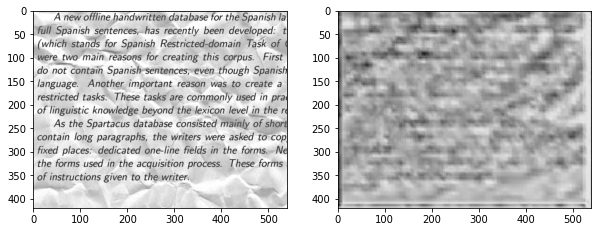

In [0]:
# Compute the prediction
predicted_label = np.squeeze(autoencoder.predict(test_img_load))
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(test_img_load[1]), cmap='gray')
ax[1].imshow(predicted_label[1], cmap='gray')
plt.show()

### **CNN COMPLEX MODEL 1**

In [0]:

#################################################################################################
#########                        CNN COMPLEX MODEL 1                                     ########
#################################################################################################

def build_autoencoder():
  input_img = tf.keras.layers.Input(shape=(420, 540, 1))

  # Encoder
  x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  

  # Decoder
  x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

  # Model
  autoencoder = tf.keras.models.Model(input_img, decoded)
  autoencoder.compile(optimizer='adam', loss=root_mean_squared_error)
  return autoencoder

autoencoder = build_autoencoder()
autoencoder.summary()

Model: "model_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_56 (InputLayer)        [(None, 420, 540, 1)]     0         
_________________________________________________________________
conv2d_342 (Conv2D)          (None, 420, 540, 32)      320       
_________________________________________________________________
batch_normalization_213 (Bat (None, 420, 540, 32)      128       
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 210, 270, 32)      0         
_________________________________________________________________
conv2d_343 (Conv2D)          (None, 210, 270, 16)      4624      
_________________________________________________________________
batch_normalization_214 (Bat (None, 210, 270, 16)      64        
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 105, 135, 16)      0  

In [0]:
# Loading the dataset by uploading the files on Colab
# Note: The train, train cleaned and test files need to renamed Train, Train_cleaned, Test respectively
# in order for the code to work.

train_images = glob.glob("Train/*.png")
train_labels = glob.glob("Train_cleaned/*.png")
test_images = glob.glob("Test/*.png")
X = []
Y = []
test_img_load = []

for img in train_images:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in train_labels:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)

for img in test_images:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    test_img_load.append(img)

X = np.array(X)
Y = np.array(Y)
test_img_load = np.array(test_img_load)

# Split the dataset into training and validation. Always set the random state!!
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

# Train your model
autoencoder.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_valid, y_valid))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Total number of training samples:  (129, 420, 540, 1)
Total number of validation samples:  (15, 420, 540, 1)
Epoch 1/100
17/17 [==============================] - 1s 82ms/step - loss: 0.4644 - val_loss: 0.4236
Epoch 2/100
17/17 [==============================] - 1s 55ms/step - loss: 0.3810 - val_loss: 0.3369
Epoch 3/100
17/17 [==============================] - 1s 55ms/step - loss: 0.3309 - val_loss: 0.2735
Epoch 4/100
17/17 [==============================] - 1s 55ms/step - loss: 0.2955 - val_loss: 0.2575
Epoch 5/100
17/17 [==============================] - 1s 55ms/step - loss: 0.2731 - val_loss: 0.2626
Epoch 6/100
17/17 [==============================] - 1s 54ms/step - loss: 0.2642 - val_loss: 0.2681
Epoch 7/100
17/17 [==============================] - 1s 54ms/step - loss: 0.2590 - val_loss: 0.2717
Epoch 8/100
17/17 [==============================] - 1s 55ms/step - loss: 0.2476 - val_loss: 0.2706
Epoch 9/100
17/17 [==============================] - 1s 55ms/step - loss: 0.2409 - val_loss

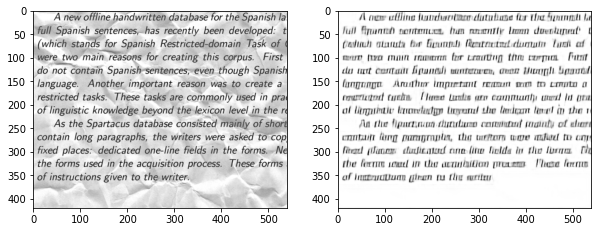

In [0]:
# Compute the prediction
predicted_label = np.squeeze(autoencoder.predict(test_img_load))
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(test_img_load[1]), cmap='gray')
ax[1].imshow(predicted_label[1], cmap='gray')
plt.show()

### **CNN COMPLEX MODEL 2**

In [0]:
#################################################################################################
#########                        CNN COMPLEX MODEL 2                                     ########
#################################################################################################

def build_autoencoder():
  input_img = tf.keras.layers.Input(shape=(420, 540, 1))

  # Encoder
  x = tf.keras.layers.Conv2D(32, (5, 5), activation=tf.nn.leaky_relu, padding='same')(input_img)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Conv2D(16, (5, 5), activation=tf.nn.leaky_relu, padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  encoded = tf.keras.layers.Conv2D(8, (5,5), activation = 'sigmoid', padding = 'same')(x)
  

  # Decoder
  x = tf.keras.layers.Conv2D(16, (5, 5), activation=tf.nn.leaky_relu, padding='same')(encoded)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(32, (5, 5), activation=tf.nn.leaky_relu, padding='same')(x)
  decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

  # Model
  autoencoder = tf.keras.models.Model(input_img, decoded)
  optimizer = tf.keras.optimizers.Adam(lr=0.003)     # Hit and try
  autoencoder.compile(optimizer=optimizer, loss=root_mean_squared_error)
  return autoencoder

autoencoder = build_autoencoder()
autoencoder.summary()



Model: "model_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_51 (InputLayer)        [(None, 420, 540, 1)]     0         
_________________________________________________________________
conv2d_329 (Conv2D)          (None, 420, 540, 32)      832       
_________________________________________________________________
batch_normalization_210 (Bat (None, 420, 540, 32)      128       
_________________________________________________________________
conv2d_330 (Conv2D)          (None, 420, 540, 16)      12816     
_________________________________________________________________
batch_normalization_211 (Bat (None, 420, 540, 16)      64        
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 210, 270, 16)      0         
_________________________________________________________________
conv2d_331 (Conv2D)          (None, 210, 270, 8)       320

In [0]:
# Loading the dataset by uploading the files on Colab
# Note: The train, train cleaned and test files need to renamed Train, Train_cleaned, Test respectively
# in order for the code to work.

train_images = glob.glob("Train/*.png")
train_labels = glob.glob("Train_cleaned/*.png")
test_images = glob.glob("Test/*.png")
X = []
Y = []
test_img_load = []

for img in train_images:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in train_labels:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)

for img in test_images:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    test_img_load.append(img)

X = np.array(X)
Y = np.array(Y)
test_img_load = np.array(test_img_load)

# Split the dataset into training and validation. Always set the random state!!
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

# Train your model
autoencoder.fit(X_train, y_train, epochs=100, batch_size=4, validation_data=(X_valid, y_valid))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Total number of training samples:  (129, 420, 540, 1)
Total number of validation samples:  (15, 420, 540, 1)
Epoch 1/100
33/33 [==============================] - 3s 85ms/step - loss: 0.1610 - val_loss: 0.2755
Epoch 2/100
33/33 [==============================] - 3s 81ms/step - loss: 0.0870 - val_loss: 0.2649
Epoch 3/100
33/33 [==============================] - 3s 81ms/step - loss: 0.0705 - val_loss: 0.2756
Epoch 4/100
33/33 [==============================] - 3s 81ms/step - loss: 0.0656 - val_loss: 0.2776
Epoch 5/100
33/33 [==============================] - 3s 81ms/step - loss: 0.0614 - val_loss: 0.2774
Epoch 6/100
33/33 [==============================] - 3s 81ms/step - loss: 0.0621 - val_loss: 0.2711
Epoch 7/100
33/33 [==============================] - 3s 81ms/step - loss: 0.0533 - val_loss: 0.2546
Epoch 8/100
33/33 [==============================] - 3s 81ms/step - loss: 0.0557 - val_loss: 0.2351
Epoch 9/100
33/33 [==============================] - 3s 80ms/step - loss: 0.0507 - val_loss

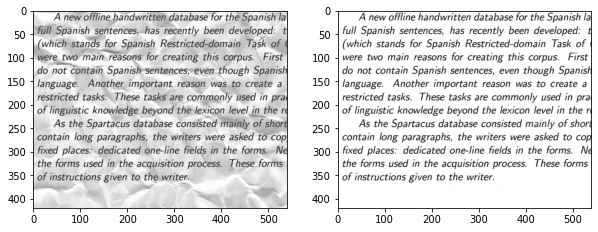

In [0]:
# Compute the prediction
predicted_label = np.squeeze(autoencoder.predict(test_img_load))
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(test_img_load[1]), cmap='gray')
ax[1].imshow(predicted_label[1], cmap='gray')
plt.show()